# 🛒 **Sales Forecasting Dashboard using Superstore Dataset**


# **📌 Problem Statement**

Build a forecasting model and an interactive dashboard to predict future sales trends for a retail business, using historical data from the Superstore dataset.

The project aims to help the business:

Plan inventory

Optimize marketing strategies

Understand seasonality patterns

Forecast expected sales over the next several months


# **🎯 Objectives**

✅ Predict future total sales using historical daily data

✅ Visualize:

Forecast vs. Actual Sales

Trend & Seasonality Components

Breakdown by Product Category / Region

✅ Build an interactive Power BI dashboard to present insights

# **🧰 Tools & Technologies**

Python

pandas → Data cleaning & preprocessing

prophet → Time-series forecasting

matplotlib, seaborn → Data visualization

Power BI → Dashboard creation & business insights

# 📦 **Dataset**

Superstore Sales Dataset
Contains order-level data: Order Date, Sales, Profit, Category, Sub-Category, Region, etc.

# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Knowing the Dataset**

In [ ]:
# Load dataset with correct encoding
df = pd.read_csv("/content/Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**🧹 Data overview & quality check**

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9989,False
9990,False
9991,False
9992,False


# **Data cleaning**

**Before exploring and modeling the data, we do some basic data wrangling to clean and simplify the dataset:**

Remove columns that are irrelevant, have only one unique value, or don't help in forecasting:

Row ID (internal index)

Order ID

Customer ID

Customer Name

Postal Code

Product ID

(high cardinality, not useful for aggregate sales forecasting)

In [ ]:
df.drop(columns=[
    'Row ID',
    'Order ID',
    'Customer ID',
    'Customer Name',
    'Postal Code',
    'Product ID'
], inplace=True)

# Convert date columns & create time-based features
To prepare the data for time series forecasting and deeper analysis, we:

Convert Order Date and Ship Date columns to datetime format
Create new time-based columns from Order Date:
year — year of the order
month — month of the order
week — week number in the year
day — day of the month
day of week — day of the week (0=Monday, 6=Sunday)
These features help us explore trends, seasonality, and patterns over time.

In [ ]:
# Convert Order Date & Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['week'] = df['Order Date'].dt.isocalendar().week
df['day'] = df['Order Date'].dt.day
df['day of week'] = df['Order Date'].dt.day_of_week

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)
**To better understand the data and find useful patterns, we explore:**

Correlations between numerical features

Distribution of sales and profit

Total sales by category, sub-category, region, and segment

Sales trend over time

These insights guide our feature selection and forecasting.

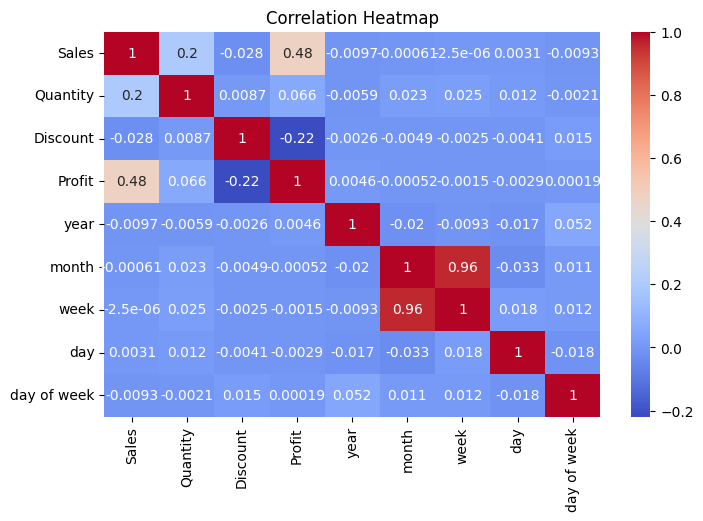

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


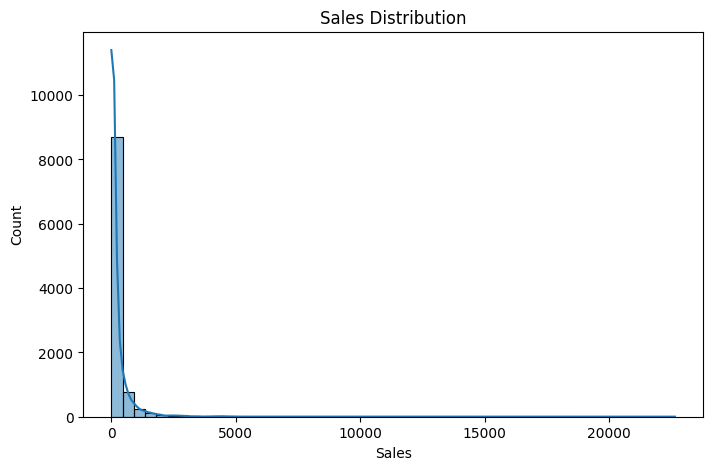

In [ ]:
# Distribution of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

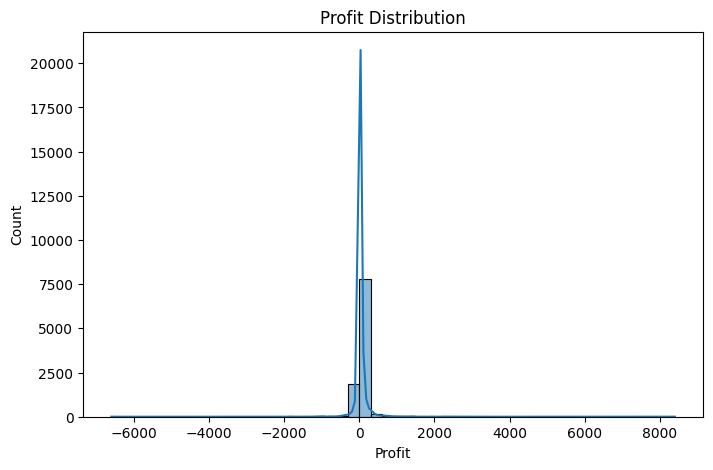

In [ ]:
# Distribution of Profit
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()


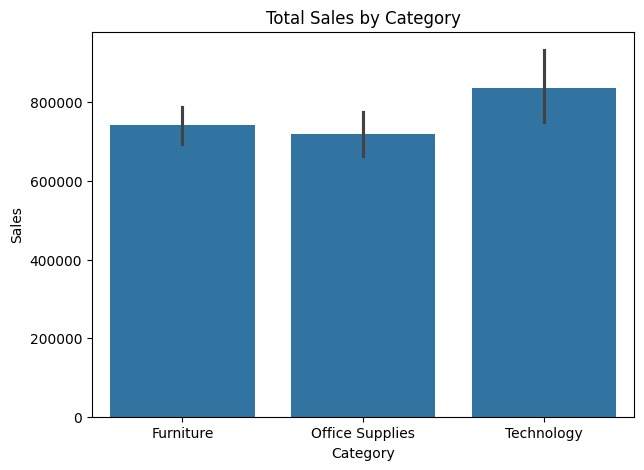

In [ ]:

# Total Sales by Category
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.show()

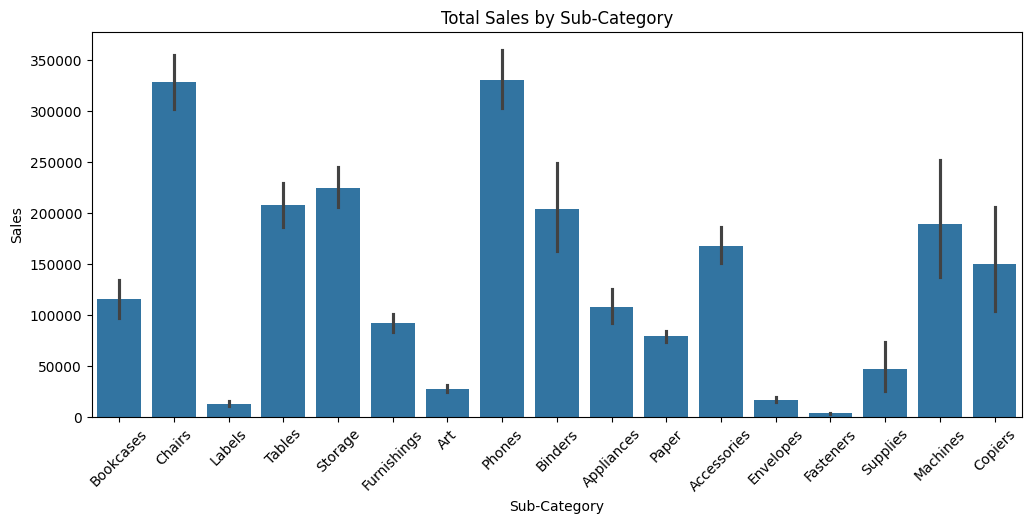

In [ ]:

# Total Sales by Sub-Category
plt.figure(figsize=(12,5))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Sub-Category")
plt.show()


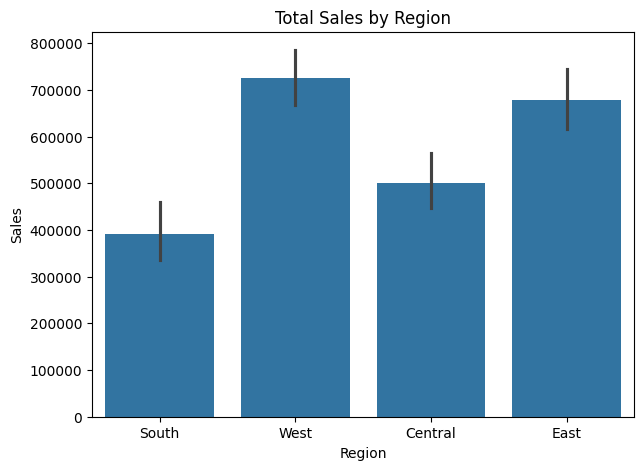

In [ ]:

# Total Sales by Region
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()


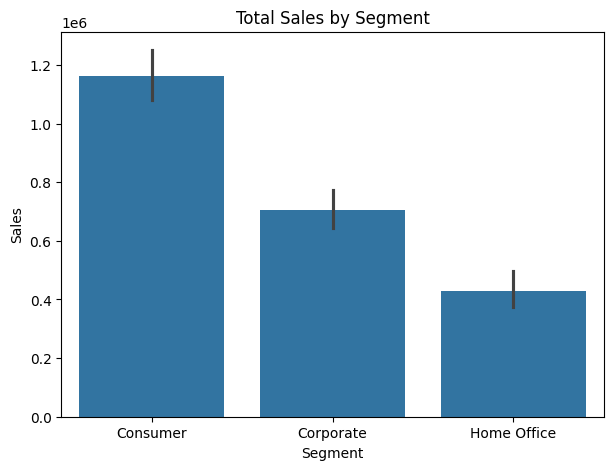

In [ ]:
# Total Sales by Segment
plt.figure(figsize=(7,5))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Segment")
plt.show()

# Aggregating Data
We aggregate total sales by Order Date because time series models like Prophet require:

One row per time point (e.g., per day)

A single target value per date (total daily sales)

This transforms our raw transactional data into a clean daily time series for forecasting.


**Why do we rename columns to ds and y?**

Prophet requires the input DataFrame to have:

ds: the datetime column

y: the numeric target variable

By renaming Order Date → ds and Sales → y, we prepare the dataset for modeling.

In [ ]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

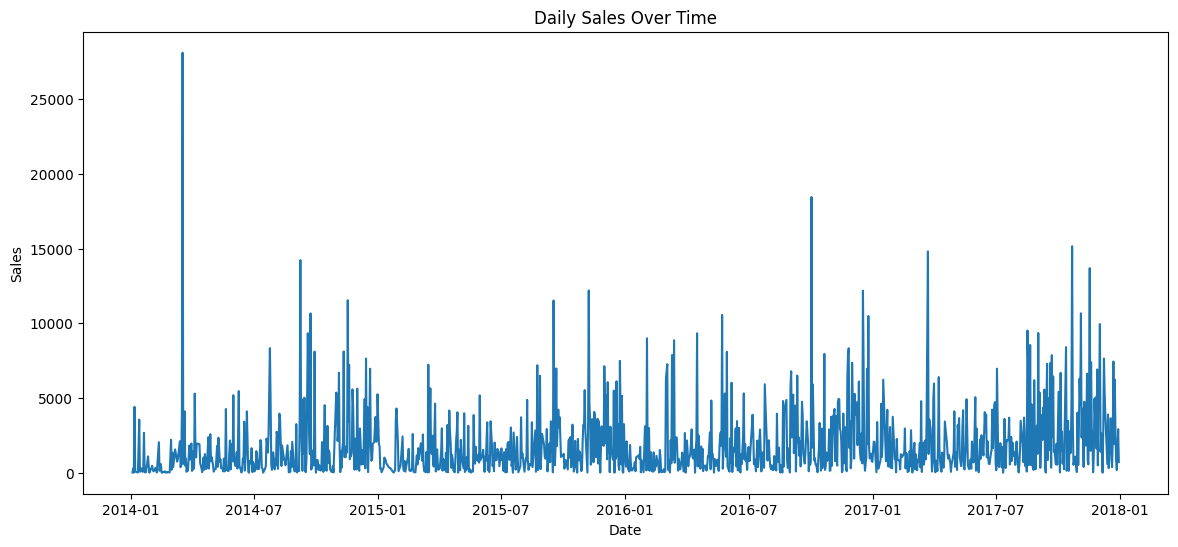

In [ ]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


# **Handling Outliers in Profit**

Negative profits are valid as they represent real losses,
but extremely high profits may distort our analysis.

We used the Interquartile Range (IQR) method to cap profits above the calculated upper bound, while keeping other values unchanged.

In [ ]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df['Profit'] = np.where(df['Profit'] > upper_bound, upper_bound, df['Profit'])

# **Model Training**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/110bnper.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/fao29l_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=403', 'data', 'file=/tmp/tmpesr7m25k/110bnper.json', 'init=/tmp/tmpesr7m25k/fao29l_x.json', 'output', 'file=/tmp/tmpesr7m25k/prophet_model1ggad3rj/prophet_model-20250816113125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


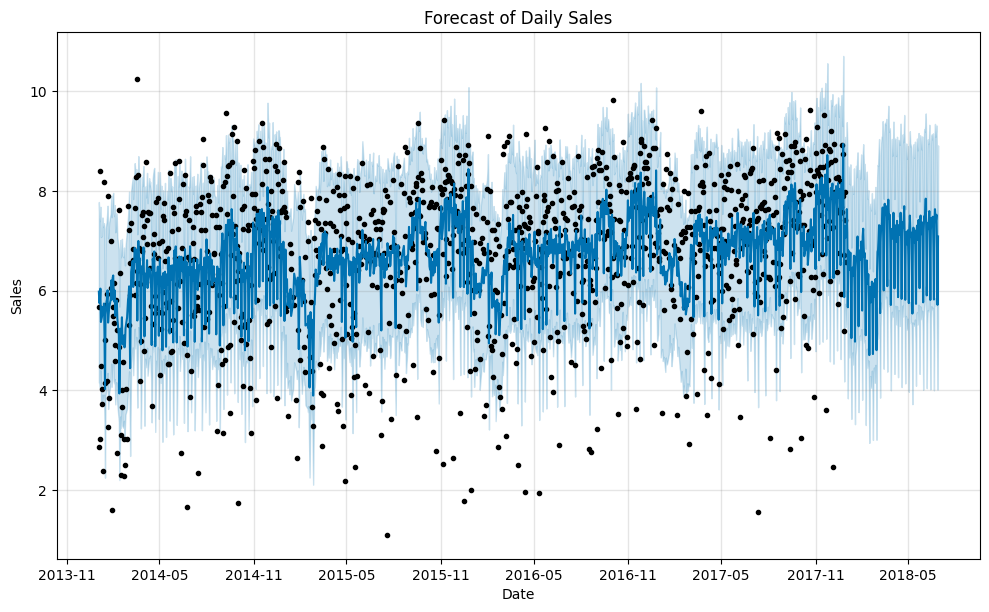

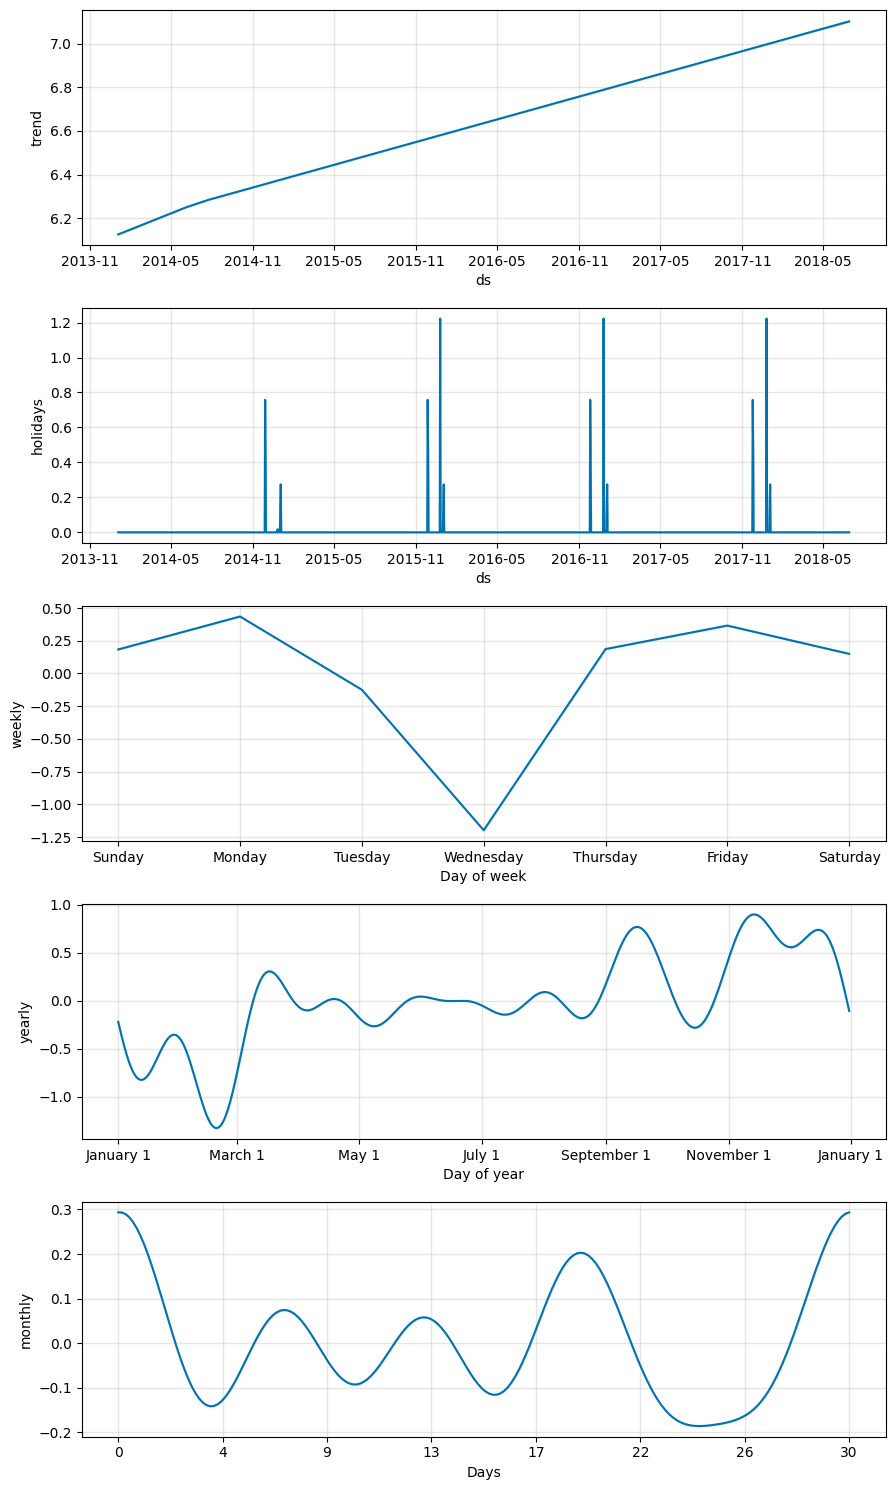

In [ ]:
from prophet import Prophet

daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
holidays = pd.DataFrame({
    'holiday': ['Black Friday']*4 + ['Christmas']*4 + ['New Year']*4,
    'ds': pd.to_datetime([
        '2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24',
        '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25',
        '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'
    ]),
    'lower_window': 0,
    'upper_window': 1
})


model = Prophet(holidays=holidays,
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

daily_sales['y'] = np.log1p(daily_sales['y'])
model.fit(daily_sales)

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

# **Model Evaluation**
To evaluate the forecasting performance, we used Prophet's built-in cross-validation method with a horizon of 9–13 days and computed standard metrics:

MAPE (Mean Absolute Percentage Error)

RMSE / MAE: show stable and reasonable absolute errors.

Coverage
These results suggest the model captures the main sales trends reasonably well, providing a reliable forecast for the business.

INFO:prophet:Making 4 forecasts with cutoffs between 2016-04-09 00:00:00 and 2017-10-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/86we5ffq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/kr4kcv11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6584', 'data', 'file=/tmp/tmpesr7m25k/86we5ffq.json', 'init=/tmp/tmpesr7m25k/kr4kcv11.json', 'output', 'file=/tmp/tmpesr7m25k/prophet_modelhl06c1gb/prophet_model-20250816113127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/atrob9fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesr7m25k/3wfj2tid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  9 days  2.121625  1.456580  1.103800  0.241323  0.112219  0.186350   
1 10 days  2.156789  1.468601  1.136634  0.248115  0.123293  0.192304   
2 11 days  2.215552  1.488473  1.184114  0.246500  0.130323  0.195480   
3 12 days  2.025462  1.423187  1.154162  0.217904  0.137895  0.182546   
4 13 days  1.552297  1.245912  1.021883  0.167994  0.123293  0.155623   

   coverage  
0  0.812500  
1  0.822917  
2  0.820312  
3  0.828125  
4  0.843750  


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


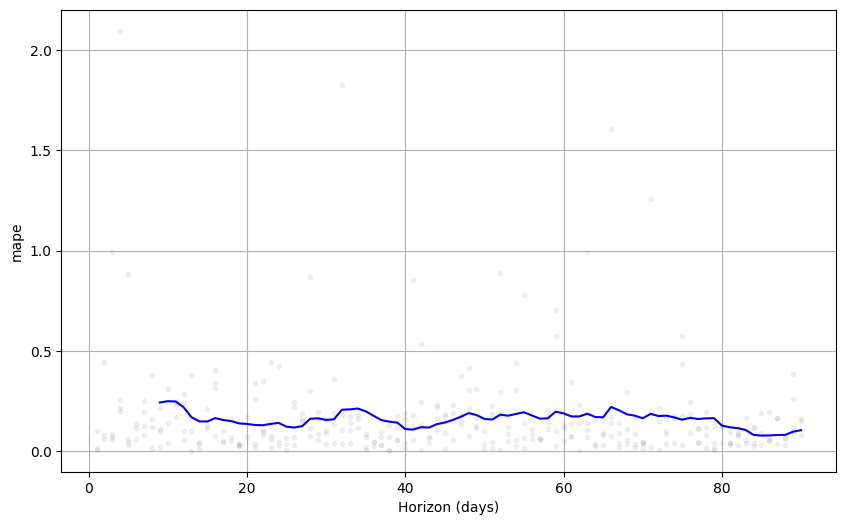

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
# horizon: how far into the future to forecast each time (e.g., 90 days)
# initial: size of the initial training period (e.g., 730 days ~ 2 years)
# period: spacing between cutoff dates

df_cv = cross_validation(model,
                         initial='730 days',
                         period='180 days',
                         horizon = '90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast with actuals
df_merged = pd.merge(daily_sales, forecast[['ds', 'yhat']], left_on='ds', right_on='ds', how='inner')

# Calculate error metrics
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))
mape = np.mean(np.abs((df_merged['y'] - df_merged['yhat']) / df_merged['y'])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Save combined dataset for Power BI
df_merged.to_csv('historical_and_forecast_sales.csv', index=False)


MAE: 1.04
RMSE: 1.34
MAPE: 19.82%


# **Exporting Dataset**

In [ ]:
# Get last available date in historical data
last_date = daily_sales['ds'].max()

# Filter only future forecasted dates
future_forecast = forecast[forecast['ds'] > last_date]

# Save future forecast
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('future_forecasted_sales.csv', index=False)

# Save historical daily sales
daily_sales.to_csv('historical_daily_sales.csv', index=False)

# Save Error matrics
metrics = {
    "Metric": ["MAE", "RMSE", "MAPE"],
    "Value": [mae,rmse, mape]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("forecast_metrics.csv", index=False)